# Домашнее задание

Будем прогнозировать количество проданного товара в городе Бангалор (Индия)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Импорт библиотек и загрузка данных

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


%matplotlib inline


# данные по продажам в Индии в различных городах и штатах
df = pd.read_csv('/content/drive/MyDrive/Datasets/market_arrivals_ind.csv')

In [ ]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
2,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
3,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
4,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01
...,...,...,...,...,...,...,...,...,...,...
10222,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01
10223,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01
10224,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01
10225,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA,2016-02-01


In [ ]:
df.date = pd.DatetimeIndex(df.date)

# Отсортируем и добавим date в индекс
df = df.sort_values(by="date")
df.index = pd.PeriodIndex(df.date, freq="M")

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Оставим только данные по городу Бангалор

In [ ]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [ ]:
# Удалим лишние столбцы
ts = dfBang.drop(
    ["market", "month", "year", "state", "city", "priceMin", "priceMax", "priceMod", "date"], axis=1
)

In [ ]:
ts.head()

,quantity
date,
2004-01,227832
2004-02,225133
2004-03,221952
2004-04,185150
2004-05,137390


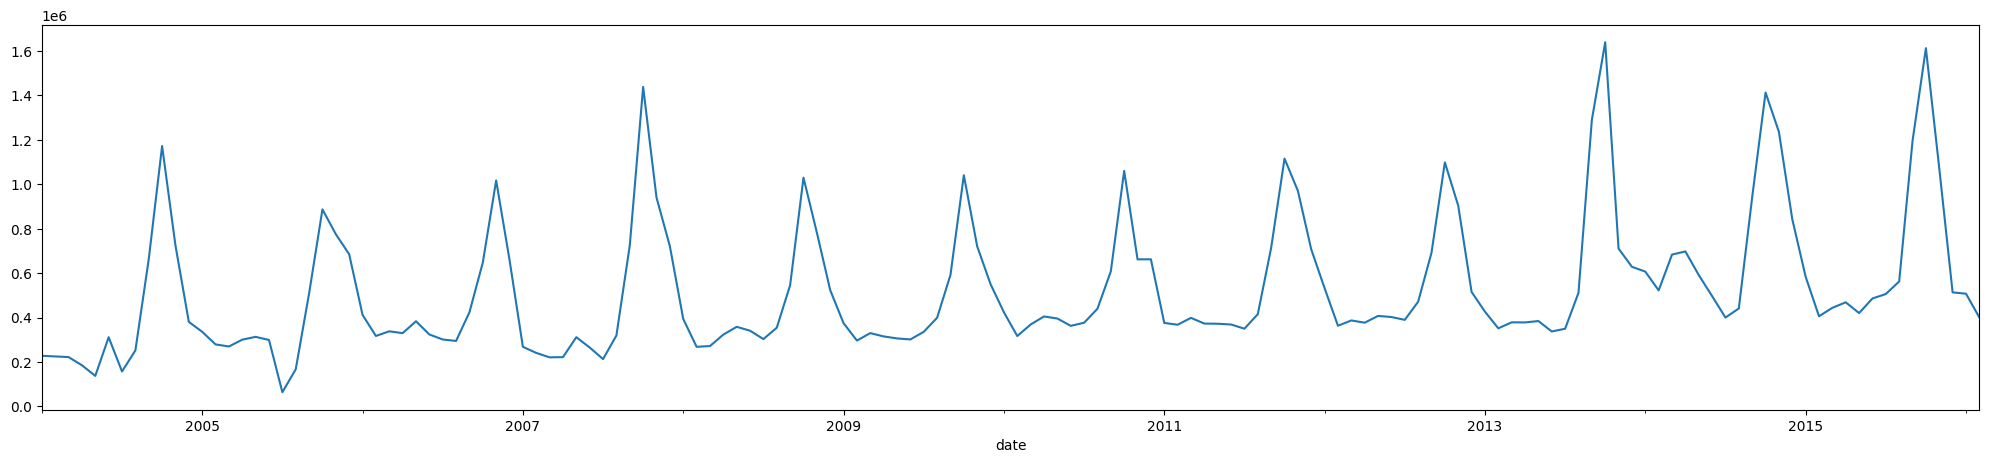

In [ ]:
ts.quantity.plot(figsize=(25,5));

## Обучение адаптивных моделей

Разбейте данные (quantity) на train и test.

* train - первые 85% данных

* test - следующие 15% данных

Проверьте, что в тест попало 22 измерения.

In [ ]:
# Calculate the index for splitting the data
split_index = int(len(ts) * 0.85)

# Split the data into train and test sets
train = ts[:split_index]
test = ts[split_index:]

# Check the size of the test set
print(len(test))  # It should print 22

22


Обучите следующие модели на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Простое экспоненциальное сглаживание с автоматически подбираемым $\alpha$

2) Модель Хольта (аддитивную) с автоматическим подбором гиперпараметров

3) Аддитивную модель Хольта с автоматическим подбором гиперпараметров и затухающим трендом

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


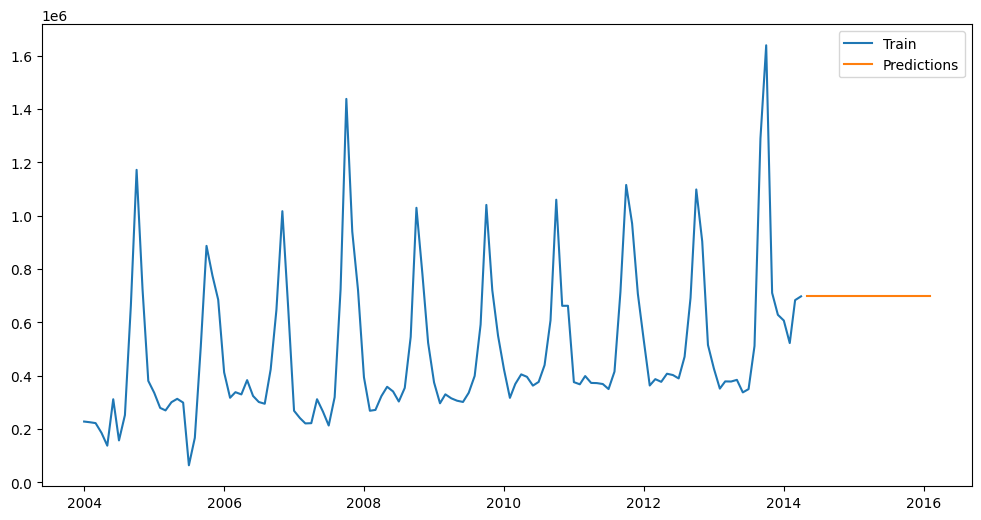

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the model
model = SimpleExpSmoothing(train['quantity'])
fit1 = model.fit(optimized=True)

# Make predictions
predictions = fit1.forecast(steps=len(test))

# Convert the index to timestamp and then to datetime
train.index = pd.to_datetime(train.index.to_timestamp())
test.index = pd.to_datetime(test.index.to_timestamp())

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(train['quantity'], label='Train')
plt.plot(test.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.show()


<ipython-input-12-7003653ff830>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=sl, smoothing_slope=ss)
<ipython-input-12-7003653ff830>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=sl, smoothing_slope=ss)
<ipython-input-12-7003653ff830>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=sl, smoothing_slope=ss)
<ipython-input-12-7003653ff830>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=sl, smoothing_slope=ss)
<ipython-input-12-7003653ff830>:18: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=sl, smoothing_slope=ss)
<ipython-input-12-7003653ff830>:18: FutureWar

Best parameters: {'smoothing_level': 0.7000000000000001, 'smoothing_slope': 0.1}
Best MSE: 129697652042.93382


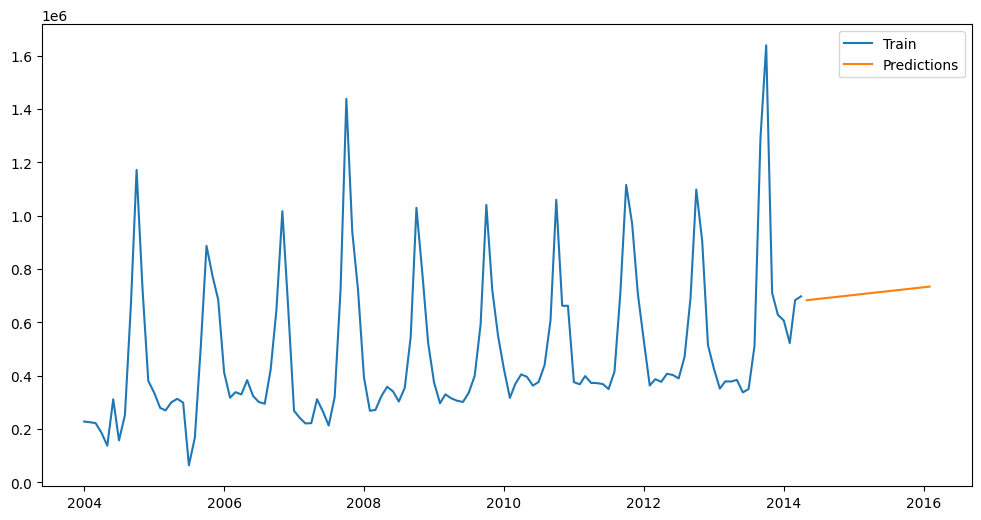

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Параметры поиска гиперпараметров
smoothing_levels = np.linspace(0.1, 0.9, 9)
smoothing_slopes = np.linspace(0.1, 0.9, 9)

best_score = float('inf')
best_params = {}

# Перебор всех комбинаций гиперпараметров
for sl in smoothing_levels:
    for ss in smoothing_slopes:
        model = ExponentialSmoothing(train['quantity'], trend='add', seasonal=None, seasonal_periods=12)
        model_fit = model.fit(smoothing_level=sl, smoothing_slope=ss)

        # Прогноз на тестовых данных
        predictions = model_fit.forecast(steps=len(test))

        # Вычисление ошибки
        mse = mean_squared_error(test['quantity'], predictions)

        # Поиск наилучшей модели
        if mse < best_score:
            best_score = mse
            best_params = {'smoothing_level': sl, 'smoothing_slope': ss}

print(f"Best parameters: {best_params}")
print(f"Best MSE: {best_score}")

# Обучение финальной модели с лучшими параметрами
best_model = ExponentialSmoothing(train['quantity'], trend='add', seasonal=None, seasonal_periods=12)
best_model_fit = best_model.fit(smoothing_level=best_params['smoothing_level'], smoothing_slope=best_params['smoothing_slope'])

# Прогнозирование на тестовом наборе данных
predictions = best_model_fit.forecast(steps=len(test))

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(train['quantity'], label='Train')
plt.plot(test.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Mean Squared Error (MSE): 181803831298.47015


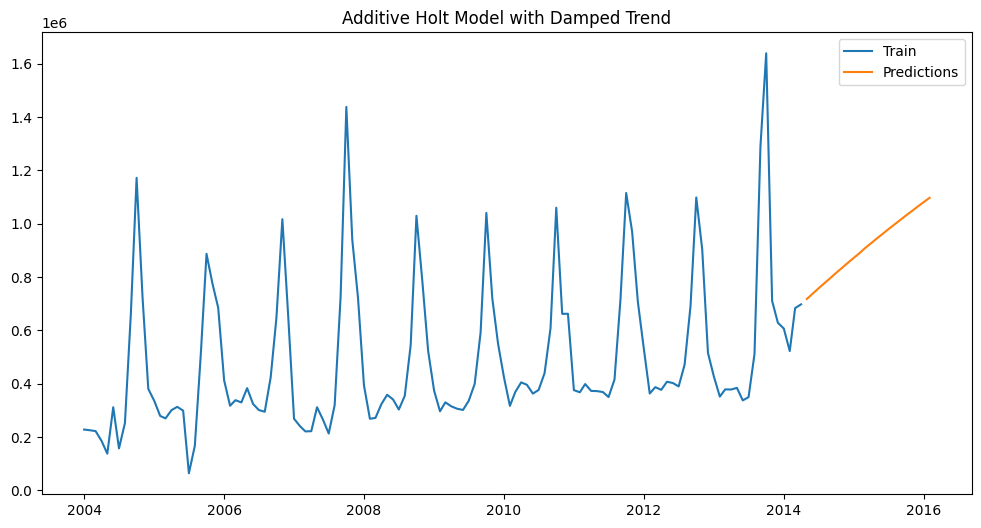

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Обучение модели Хольта с аддитивным трендом и автоматическим подбором параметров
model = ExponentialSmoothing(train['quantity'], trend='add', damped_trend=True, seasonal=None, seasonal_periods=12)

# Автоматическая оптимизация гиперпараметров
model_fit = model.fit(optimized=True)

# Прогнозирование на тестовом наборе данных
predictions = model_fit.forecast(steps=len(test))

# Вычисление метрики качества (Mean Squared Error)
mse = mean_squared_error(test['quantity'], predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(train['quantity'], label='Train')
plt.plot(test.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.title("Additive Holt Model with Damped Trend")
plt.show()


## Вопрос

У какой из трех обученных моделей самый быстро возрастающий тренд?

У 3-ей модели аддитивной модели Хольта с автоматическим подбором гиперпараметров и затухающим трендом - самый быстро возрастающий тренд



Обучите четыре модели Хольта-Винтерса на тренировочных данных и сделайте прогноз на 22 шага вперед (величина тестовых данных), нарисуйте прогнозы:

1) Модель с аддитивными трендом и сезонностью

2) Модель с аддитивным трендом и мультипликативной сезонностью

3) Модель с аддитивными трендом и сезонностью и затухающим трендом

4) Модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


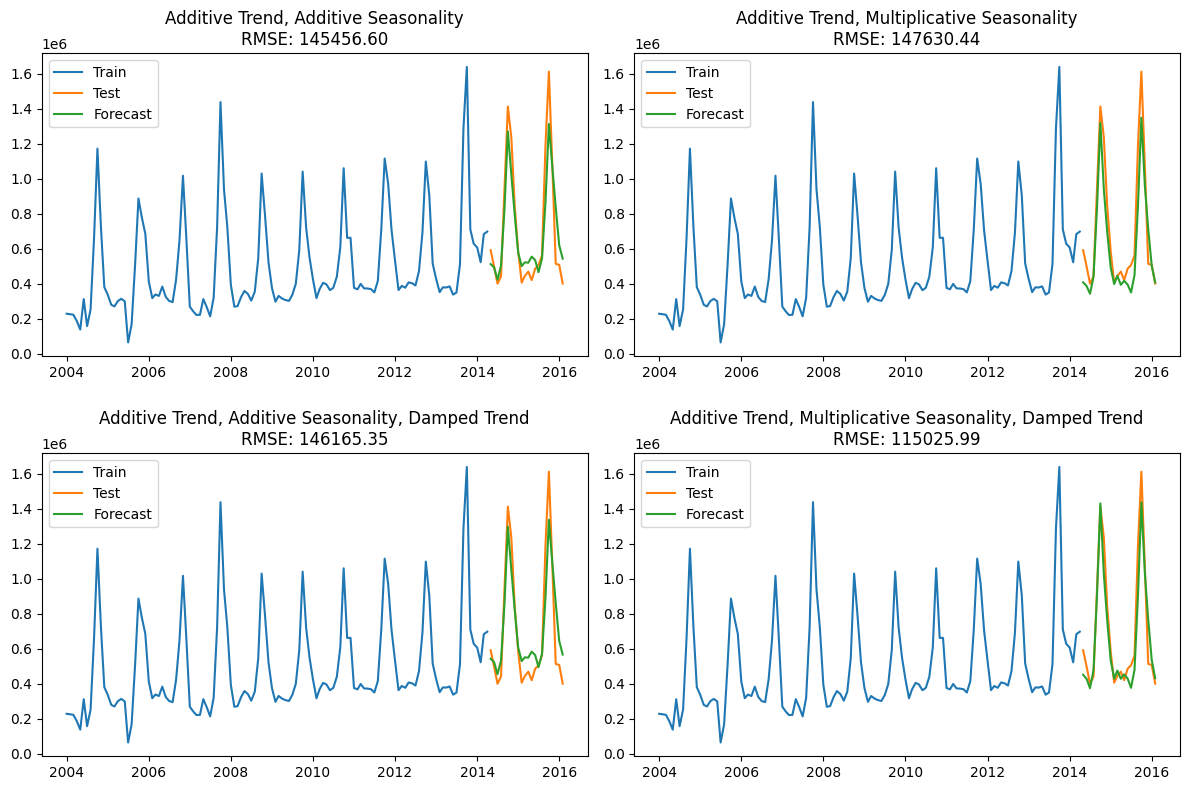

Model 1 (Additive Trend, Additive Seasonality) RMSE: 145456.60
Model 2 (Additive Trend, Multiplicative Seasonality) RMSE: 147630.44
Model 3 (Additive Trend, Additive Seasonality, Damped Trend) RMSE: 146165.35
Model 4 (Additive Trend, Multiplicative Seasonality, Damped Trend) RMSE: 115025.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Функция для расчета RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Данные (замените train['quantity'] и test['quantity'] своими данными)
train_data = train['quantity']
test_data = test['quantity']
n_steps = len(test_data)

# Модель 1: Аддитивные тренд и сезонность
model_1 = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_1_fit = model_1.fit(optimized=True)
forecast_1 = model_1_fit.forecast(steps=n_steps)
rmse_1 = calculate_rmse(test_data, forecast_1)

# Модель 2: Аддитивный тренд и мультипликативная сезонность
model_2 = ExponentialSmoothing(train_data, trend='add', seasonal='mul', seasonal_periods=12)
model_2_fit = model_2.fit(optimized=True)
forecast_2 = model_2_fit.forecast(steps=n_steps)
rmse_2 = calculate_rmse(test_data, forecast_2)

# Модель 3: Аддитивные тренд и сезонность и затухающий тренд
model_3 = ExponentialSmoothing(train_data, trend='add', damped_trend=True, seasonal='add', seasonal_periods=12)
model_3_fit = model_3.fit(optimized=True)
forecast_3 = model_3_fit.forecast(steps=n_steps)
rmse_3 = calculate_rmse(test_data, forecast_3)

# Модель 4: Аддитивный тренд и мультипликативная сезонность и затухающий тренд
model_4 = ExponentialSmoothing(train_data, trend='add', damped_trend=True, seasonal='mul', seasonal_periods=12)
model_4_fit = model_4.fit(optimized=True)
forecast_4 = model_4_fit.forecast(steps=n_steps)
rmse_4 = calculate_rmse(test_data, forecast_4)

# Визуализация прогнозов
plt.figure(figsize=(12, 8))

# График для модели 1
plt.subplot(2, 2, 1)
plt.plot(train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast_1, label='Forecast')
plt.title(f'Additive Trend, Additive Seasonality\nRMSE: {rmse_1:.2f}')
plt.legend(loc='best')

# График для модели 2
plt.subplot(2, 2, 2)
plt.plot(train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast_2, label='Forecast')
plt.title(f'Additive Trend, Multiplicative Seasonality\nRMSE: {rmse_2:.2f}')
plt.legend(loc='best')

# График для модели 3
plt.subplot(2, 2, 3)
plt.plot(train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast_3, label='Forecast')
plt.title(f'Additive Trend, Additive Seasonality, Damped Trend\nRMSE: {rmse_3:.2f}')
plt.legend(loc='best')

# График для модели 4
plt.subplot(2, 2, 4)
plt.plot(train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, forecast_4, label='Forecast')
plt.title(f'Additive Trend, Multiplicative Seasonality, Damped Trend\nRMSE: {rmse_4:.2f}')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Вывод RMSE для каждой модели
print(f"Model 1 (Additive Trend, Additive Seasonality) RMSE: {rmse_1:.2f}")
print(f"Model 2 (Additive Trend, Multiplicative Seasonality) RMSE: {rmse_2:.2f}")
print(f"Model 3 (Additive Trend, Additive Seasonality, Damped Trend) RMSE: {rmse_3:.2f}")
print(f"Model 4 (Additive Trend, Multiplicative Seasonality, Damped Trend) RMSE: {rmse_4:.2f}")


## Вопрос

Какая модель справилась лучше остальных?

Лучше всего справилась 4-ая модель с аддитивным трендом и мультипликативной сезонностью и затухающим трендом

## Вопрос

Какое семейство моделей лучше справилось с решением задачи?

Семейство моделей Хольта-Винтерса

## Задание


Воспользуйтесь экспоненциальными моделями из библиотеки Orbit для получения прогноза в данной задаче.

In [ ]:
!pip install orbit-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.9/446.9 kB 9.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 40.0 MB/s eta 0:00:00
  Created wheel for orbit-ml: filename=orbit_ml-1.1.4.9-py3-none-any.whl size=4787974 sha256=3bb9544c11f8e07cf3fb7b6224ce22dda2e0c8d7939b1e2c9d599c6f40387469
  Stored in directory: /root/.cache/pip/wheels/75/41/1f/0cf7c99cfecde7689dbcdc5f76cd1b5b3aceb6b0e0970a31de
Successfully built orbit-ml


2024-10-03 04:37:12 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-10-03 04:37:14 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-10-03 04:37:17 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

2024-10-03 04:37:19 - orbit - INFO - Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.
INFO:orbit:Sampling (CmdStanPy) with chains: 4, cores: 2, temperature: 1.000, warmups (per chain): 225 and samples(per chain): 25.


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

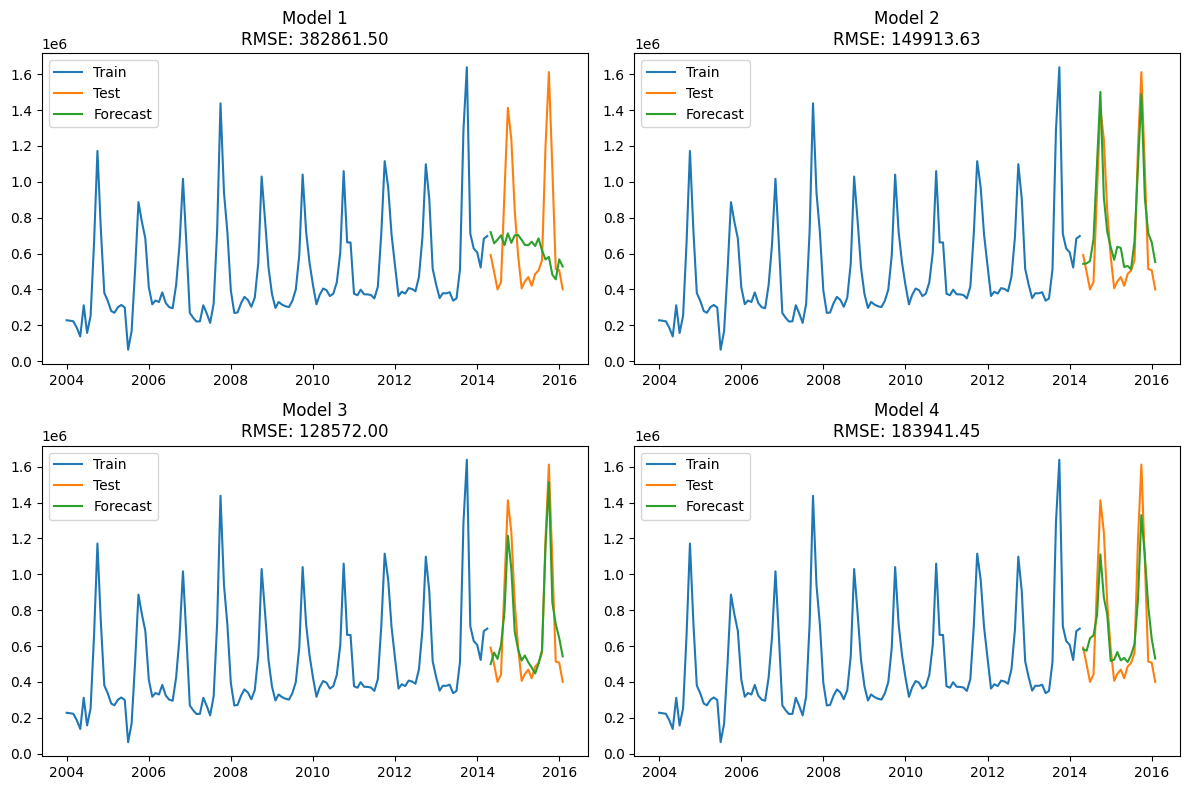

Model 1 RMSE: 382861.50
Model 2 RMSE: 149913.63
Model 3 RMSE: 128572.00
Model 4 RMSE: 183941.45


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from orbit.models import ETS
from orbit.diagnostics.metrics import smape
from orbit.diagnostics.plot import plot_predicted_data

# Функция для расчета RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Извлечение данных для тренировки и теста
train_data = train.reset_index().rename(columns={'index': 'date', 'quantity': 'value'})
test_data = test.reset_index().rename(columns={'index': 'date', 'quantity': 'value'})
n_steps = len(test_data)

ets_model_1 = ETS(
    response_col='value',
    date_col='date',
    seasonality=0,
)
ets_model_1.fit(train_data)
forecast_1 = ets_model_1.predict(df=test_data)['prediction']
rmse_1 = calculate_rmse(test_data['value'], forecast_1)

ets_model_2 = ETS(
    response_col='value',
    date_col='date',
    seasonality=12
)
ets_model_2.fit(train_data)
forecast_2 = ets_model_2.predict(df=test_data)['prediction']
rmse_2 = calculate_rmse(test_data['value'], forecast_2)

ets_model_3 = ETS(
    response_col='value',
    date_col='date',
    seasonality=24,
)
ets_model_3.fit(train_data)
forecast_3 = ets_model_3.predict(df=test_data)['prediction']
rmse_3 = calculate_rmse(test_data['value'], forecast_3)

ets_model_4 = ETS(
    response_col='value',
    date_col='date',
    seasonality=48
)
ets_model_4.fit(train_data)
forecast_4 = ets_model_4.predict(df=test_data)['prediction']
rmse_4 = calculate_rmse(test_data['value'], forecast_4)

# Визуализация прогнозов
plt.figure(figsize=(12, 8))

# График для модели 1
plt.subplot(2, 2, 1)
plt.plot(train_data['date'], train_data['value'], label='Train')
plt.plot(test_data['date'], test_data['value'], label='Test')
plt.plot(test_data['date'], forecast_1, label='Forecast')
plt.title(f'Model 1\nRMSE: {rmse_1:.2f}')
plt.legend(loc='best')

# График для модели 2
plt.subplot(2, 2, 2)
plt.plot(train_data['date'], train_data['value'], label='Train')
plt.plot(test_data['date'], test_data['value'], label='Test')
plt.plot(test_data['date'], forecast_2, label='Forecast')
plt.title(f'Model 2\nRMSE: {rmse_2:.2f}')
plt.legend(loc='best')

# График для модели 3
plt.subplot(2, 2, 3)
plt.plot(train_data['date'], train_data['value'], label='Train')
plt.plot(test_data['date'], test_data['value'], label='Test')
plt.plot(test_data['date'], forecast_3, label='Forecast')
plt.title(f'Model 3\nRMSE: {rmse_3:.2f}')
plt.legend(loc='best')

# График для модели 4
plt.subplot(2, 2, 4)
plt.plot(train_data['date'], train_data['value'], label='Train')
plt.plot(test_data['date'], test_data['value'], label='Test')
plt.plot(test_data['date'], forecast_4, label='Forecast')
plt.title(f'Model 4\nRMSE: {rmse_4:.2f}')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Вывод RMSE для каждой модели
print(f"Model 1 RMSE: {rmse_1:.2f}")
print(f"Model 2 RMSE: {rmse_2:.2f}")
print(f"Model 3 RMSE: {rmse_3:.2f}")
print(f"Model 4 RMSE: {rmse_4:.2f}")
